In [2]:
import pandas as pd
df = pd.read_csv("converted_portfolio_data.csv", index_col="Date", parse_dates=True)
updated_tickers = ['VUAG.L', 'VWRP.L', 'JPM', 'CNDX', 'RR.L', 'AAPL', 'NVDA', 'CMG']
last_7_days = df.tail(7)
adj_close_last_7 = pd.DataFrame()
for ticker in updated_tickers:
    adj_close_col = f"{ticker}_Adj Close"
    if adj_close_col in df.columns:
        adj_close_last_7[ticker] = last_7_days[adj_close_col]
print("Adjusted Close Prices - Last 7 Days:")
print('=' * 50)
adj_close_last_7

Adjusted Close Prices - Last 7 Days:


,VUAG.L,VWRP.L,JPM,CNDX,RR.L,AAPL,NVDA,CMG
Date,,,,,,,,
2025-08-26,91.480003,117.559998,221.927085,998.549234,10.575,170.446120,135.109644,31.605116
2025-08-27,92.089996,117.959999,222.038825,1000.094685,10.565,171.002841,134.730861,31.642463
2025-08-28,91.800003,117.839996,222.951384,1004.158731,10.585,172.217664,133.421295,31.405879
2025-08-29,91.510002,117.320000,223.089988,993.106440,10.700,171.813773,128.915834,31.189077
2025-09-02,91.220001,117.139999,221.214584,974.761303,10.690,169.560936,126.056139,30.816512
2025-09-03,91.650002,117.500000,223.790885,1000.935708,10.820,178.182401,127.485554,31.225071
2025-09-04,92.309998,118.160004,226.029932,1001.667759,10.695,178.386727,127.708176,30.807383


In [3]:
holdings = {
    'AAPL': 0.527141, 
    'CMG': 1.943039, 
    'NVDA': 0.5050785,
    'RR.L': 16.9452464,
    'CNDX': 0.2060825,
    'JPM': 1.0610443,
    'VWRP.L': 10.6251097,
    'VUAG.L': 30.853993
}

In [4]:
purchase_dates = {
    'AAPL': '2024-12-09',
    'CMG': '2024-12-09',
    'NVDA': '2025-01-28', 
    'RR.L': '2024-12-09',
    'CNDX': '2024-12-09',
    'JPM': '2024-12-17',
    'VWRP.L': '2024-12-09',
    'VUAG.L': '2024-12-09'
}
import datetime as dt
purchase_dates_dt = {ticker: dt.datetime.strptime(date, '%Y-%m-%d') for ticker, date in purchase_dates.items()}

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
today = datetime(2025, 8, 29)
performance_metrics = []
for ticker in holdings.keys():
    pd_date = pd.to_datetime(purchase_dates[ticker])
    if pd_date < df.index[0]:
        first_date = df.index[0]
    else:
        first_date = df.index[df.index >= pd_date][0]
    start_value = df[f'{ticker}_Adj Close'][first_date]
    end_value = df[f'{ticker}_Adj Close'].iloc[-1]
    total_return = (end_value / start_value) - 1
    years_held = (today - purchase_dates_dt[ticker]).days / 365.25
    if years_held > 0:
        annualized = ((1 + total_return) ** (1 / years_held)) - 1
    else:
        annualized = 0
    performance_metrics.append({
        'Ticker': ticker,
        'Purchase Date': purchase_dates[ticker],
        'Days Held': (today - purchase_dates_dt[ticker]).days,
        'Starting Price': start_value,
        'Current Price': end_value,
        'Total Return %': total_return * 100,
        'Annualized Return %': annualized * 100
    })
performance_df = pd.DataFrame(performance_metrics)
performance_df = performance_df.sort_values('Total Return %', ascending=False)
performance_df.head(10)

,Ticker,Purchase Date,Days Held,Starting Price,Current Price,Total Return %,Annualized Return %
3,RR.L,2024-12-09,263,5.823276,10.695000,83.659496,132.625530
2,NVDA,2025-01-28,213,103.501649,127.708176,23.387576,43.387477
5,JPM,2024-12-17,255,184.828222,226.029932,22.291894,33.408748
6,VWRP.L,2024-12-09,263,112.480003,118.160004,5.049787,7.081208
4,CNDX,2024-12-09,263,962.719811,1001.667759,4.045616,5.662311
7,VUAG.L,2024-12-09,263,90.175003,92.309998,2.367612,3.303161
0,AAPL,2024-12-09,263,192.855467,178.386727,-7.502375,-10.264823
1,CMG,2024-12-09,263,50.653777,30.807383,-39.180481,-49.871755


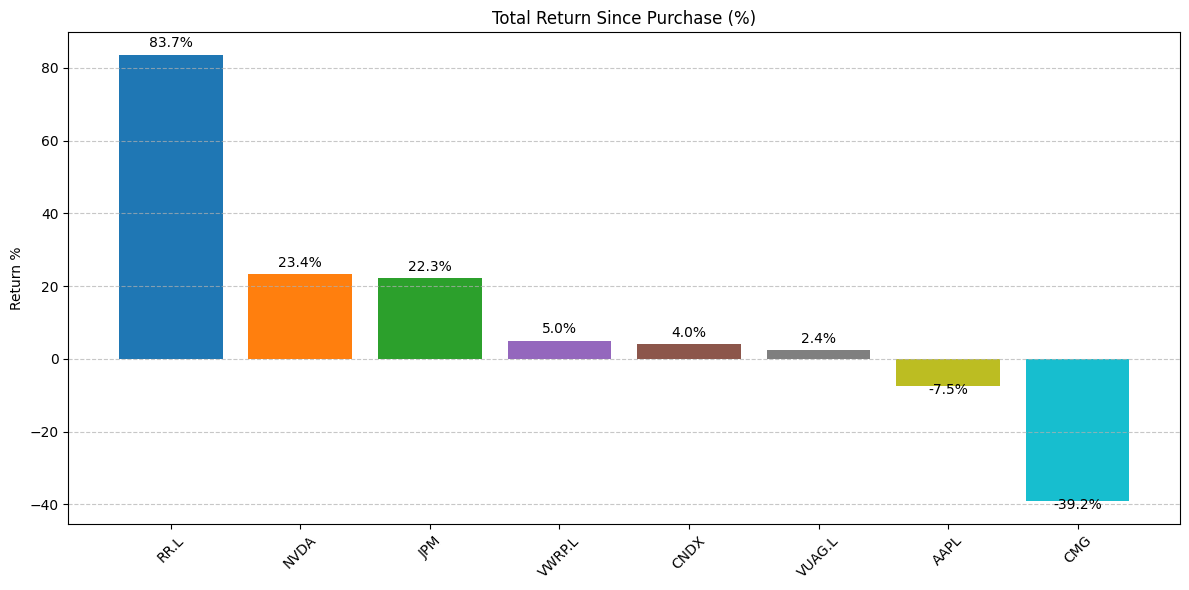

In [6]:
plt.figure(figsize=(12, 6))
plt.bar(performance_df['Ticker'], performance_df['Total Return %'], 
       color=plt.cm.tab10(np.linspace(0, 1, len(performance_df))))
plt.title('Total Return Since Purchase (%)')
plt.ylabel('Return %')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
for i, val in enumerate(performance_df['Total Return %']):
    plt.text(i, val + np.sign(val)*2, f'{val:.1f}%', ha='center')
plt.tight_layout()
plt.show()

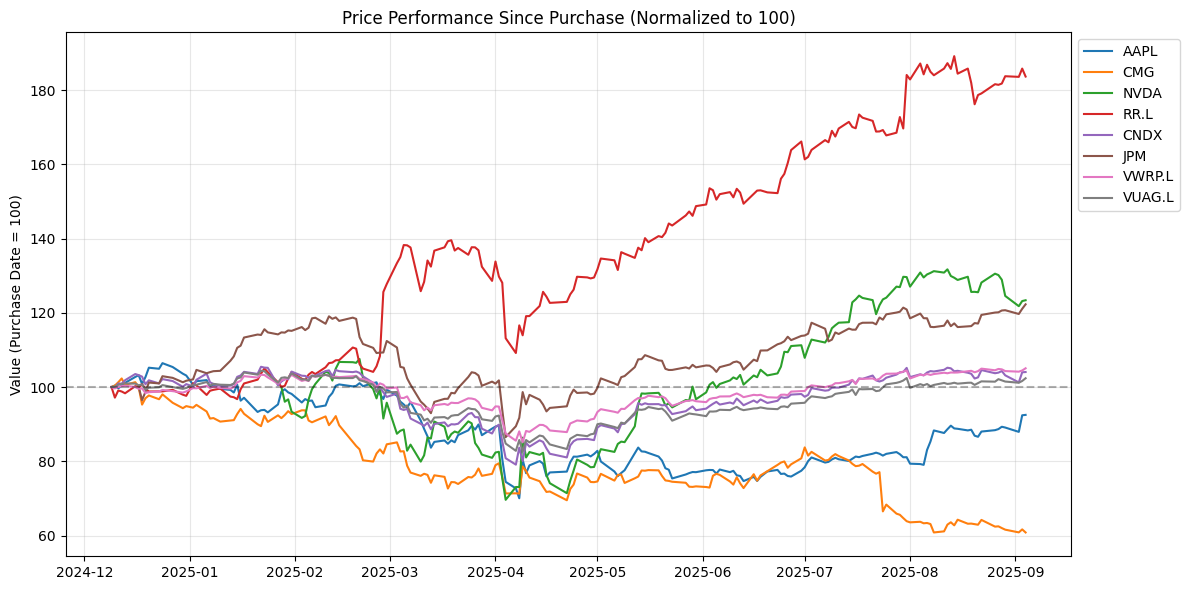

In [7]:
plt.figure(figsize=(12, 6))
plt.title('Price Performance Since Purchase (Normalized to 100)')
plt.ylabel('Value (Purchase Date = 100)')
for ticker in holdings.keys():
    pd_date = pd.to_datetime(purchase_dates[ticker])
    if pd_date < df.index[0]:
        first_date = df.index[0]
    else:
        first_date = df.index[df.index >= pd_date][0]
    norm_price = 100 * df[f'{ticker}_Adj Close'] / df[f'{ticker}_Adj Close'][first_date]
    norm_price = norm_price[norm_price.index >= first_date]
    plt.plot(norm_price, label=ticker)
plt.axhline(y=100, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

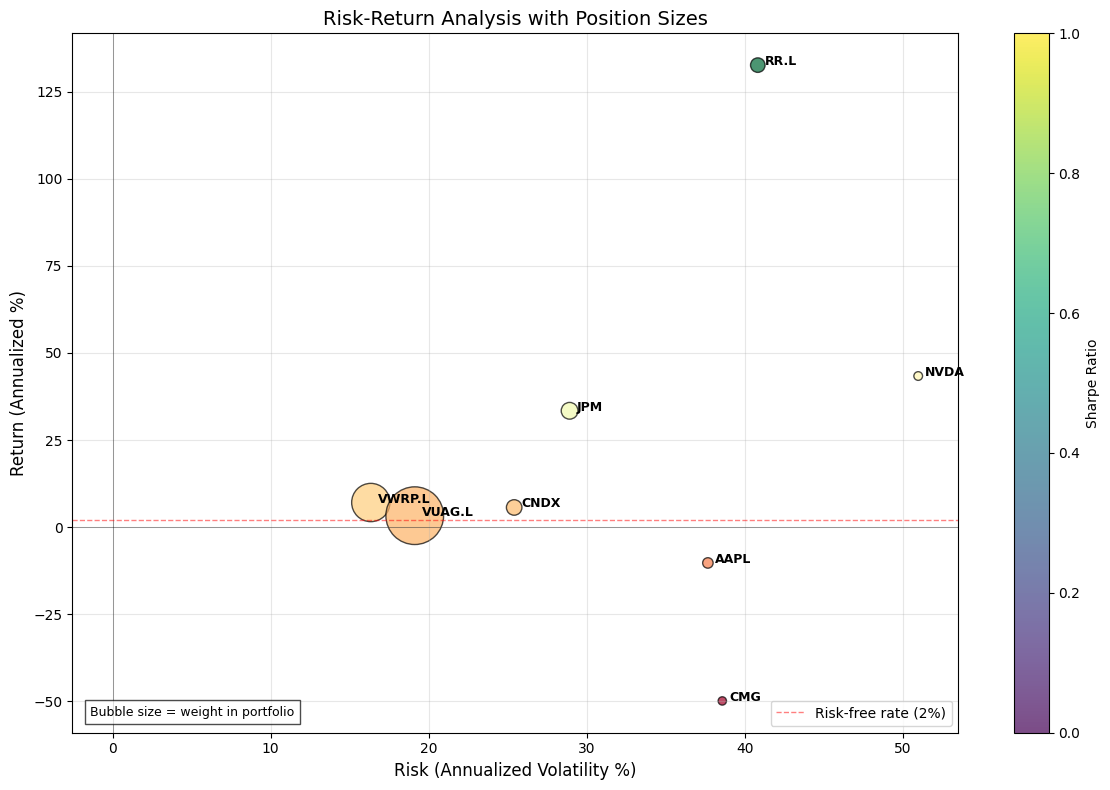

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
current_values = {}
for ticker in holdings.keys():
    current_price = df[f'{ticker}_Adj Close'].iloc[-1] 
    current_values[ticker] = holdings[ticker] * current_price
tickers = list(holdings.keys())
purchase_dates_series = pd.to_datetime(pd.Series(purchase_dates))
adj_close = pd.DataFrame({
    ticker: df.loc[df.index >= purchase_dates_series[ticker], f'{ticker}_Adj Close']
    for ticker in tickers
})
daily_returns = adj_close.pct_change().dropna()
volatility = daily_returns.std() * np.sqrt(252) * 100
annualized_return = performance_df.set_index('Ticker').loc[tickers, 'Annualized Return %']
current_values_series = pd.Series(current_values)
total_value = current_values_series.sum()
weights = current_values_series / total_value * 100  
sharpe = (annualized_return - 2) / volatility
risk_df = pd.DataFrame({
    'Ticker': tickers,
    'Weight': weights.values,
    'Annualized Return': annualized_return.values,
    'Volatility': volatility.values,
    'Sharpe Ratio': sharpe.values,
    'Position Size': current_values_series.values
})
plt.figure(figsize=(12, 8))
colors = plt.cm.RdYlGn((sharpe - sharpe.min()) / (sharpe.max() - sharpe.min()))
scatter = plt.scatter(risk_df['Volatility'], risk_df['Annualized Return'], 
                      s=risk_df['Weight'] * 30, c=colors, alpha=0.7, edgecolors='black')
for _, row in risk_df.iterrows():
    plt.annotate(row['Ticker'], xy=(row['Volatility'], row['Annualized Return']),
                 xytext=(5, 0), textcoords='offset points', fontsize=9, fontweight='bold')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
plt.axhline(y=2, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Risk-free rate (2%)')
plt.title('Risk-Return Analysis with Position Sizes', fontsize=14)
plt.xlabel('Risk (Annualized Volatility %)', fontsize=12)
plt.ylabel('Return (Annualized %)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.colorbar(scatter, label='Sharpe Ratio')
plt.legend()
plt.text(0.02, 0.02, 'Bubble size = weight in portfolio', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.7))
plt.tight_layout()
plt.show()